<a href="https://colab.research.google.com/github/arungyaw/Operations_Research/blob/main/GoalProgramming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Goal Programming**

# **Introduction**

Goal Programming is a modification and extension of linear programming, Goal Programming extends the linear programming formulation to accommodate mathematical programming with multiple objectives
It is a branch of multi-objective optimization and is based under multi-criteria decision-making analysis (MCDMA). This is an optimization programming to handle multiple,
normally conflicting objective measures. Measures are given a goal or target value to be achieved.
Unwanted deviations from this set of target values are then minimized in an achievement function.
This can be a vector or a weighted sum dependent on the goal programming variant used.

## **Types of Goal Programming models.**

In Goal Programming there are two basic models: the preemptive (lexicographic) model and the non-preemptive (Archimedean) model.

In the pre-emptive model, goals are ranked according to their priorities. The goals at a certain priority level are considered to be infinitely more important than the goals at the next level. In this model the problem is optimized one goal at a time so that the optimal value of the higher-ranking goal is not compromised by lower ranking goal.

In the non-preemptive model, all the goals are of comparably equal importance, but in non-preemptive model the constraints have certain upper and lower limits and as long as the solution is within those limits it is considered optimal.



## **Steps of Goal Programming.**

Goal programming is used to perform three types of analysis:
1. Determine the required resources to achieve a desired set of objectives.
2. Determine the degree of attainment of the goals with the available resources.
3. Providing the best satisfying solution under a varying number of resources and priorities of
the goals.

#**Why Goal Programming?**
Goal Programming is used to solve problems in real life that have several objectives, for example if a healthcare company only focuses on providing top-quality healthcare the profit for the company might not be what they expected or if a publishing company spends too much time in making an error free book the release date might be pushed beyond the initial date, so focusing on only one objective can affect the goal that is important to an organization, Goal Programming can simultaneously take into account several objectives and provide an optimal solution which can help achieve the desired goal.

# **History of Goal Programming.**



The history of Goal Programming goes back to the years after the end of the 2nd world war when the industrial world was facing depression, though it wasn’t officially called Goal Programming then, industrialists were trying out various models which was successfully solving their problems and they soon learnt that this mathematical technique could be easily applied to solve industrial problems. Goal Programming was used to minimize the cost of production, increase the productivity, and use the available resources carefully and for healthy industrial growth. After that various model of Goal Programming were developed to solve industrial problems, so we can say that industries played an important role in the development of Goal Programming. Goal Programming was first used by Charnes, Cooper and Ferguson in 1955, but officially the name Goal Programming was mentioned in 1961 in a text by Charnes and Cooper.

The first engineering application of Goal Programming was used for design and placement of the antennas on the second stage of the Saturn V rocket in 1962, which was used to launch the Apollo space capsule that landed the first men on the moon.


#**Why Goal Programming is different than linear programming?**
Goal Programming is a problem related programming which focuses on multicriteria decision making which implies more than one objective. Somewhat, it has similarities to Linear Programming and can also be solved using Simplex method, Python or Lingo. 

The difference is that while the Linear Programming works on an objective function to be optimized, subjects to absolute constraints, the Goal Programming operates on more objective functions with priorities, whose goals can be reached to a greater or lesser extent. For this reason, the GP model is more flexible than LP one, aiming at a satisfactory solution rather than optimizing (Sikha, 2018).A goal programming (GP) model deals with goals simultaneously that are of concern to a decision maker. While a Linear Programming model consists of constraints and a single objective function to be maximized or minimized (Nesticò,2020).
. For ex: We have a problem where in linear programming our solution would have been: minimize cost but in Goal Programming we can have two(conflicting) objectives such as: minimize cost and do not produce excess one or maybe three(conflicting) objectives.



# **Problems/Solutions**
Following are few solved problems regarding Goal Programming.


##1)
Suppose a company is considering three forms of advertising: Television($X_1$), Radio($X_2$), and internet ($X_3$). Each television spot costs \$3000 to run and reaches 1,000 new potential customers; each radio spot costs \$800 to run and reaches 500 new customers; and each internet ad costs \$250 to run and reaches 200 new customers.
Let’s say the company has three goals (not a single like LP)


*   **Goal 1: Spend no more than $25,000 on advertising.**


*   **Goal 2: Reach at least 30,000 new potential customers.**


* **Goal 3: Run at least 10 television spots.**



##Solution:

We can make constraints for the following conditions:



 
*   $$3000X_1 + 800X_2 + 250X_3 \leq 25000----(i)$$
*  $$1000X_1 + 500X_2 + 200X_3 \leq 30000 ----(ii)$$
*   $$X_1 \leq 10 ------(iii)$$
 
 If we look at equation (iii), it contradicts with equation (i) and the problem will be unsolvable . So, the problem couldn't be solved through this approach. That's why we have to use Goal Programming for this problem. So, we will suppose new variables for further :

 **$U_i$ = the amount by which L.H.S falls short of its R.H.S Value.**
 
 **$E_i$ = the amount by which L.H.S exceeds its R.H.S value.**
  
  So, now we can write our equations as:

*   $$3000X_1 + 800X_2 + 250X_3 + U_1 - E_1 = 25000----(i)$$
*   $$1000X_1 + 500X_2 + 200X_3 + U_2 - E_2 = 30000 ----(ii)$$   
*   $$X_1 + U_3 - E_3 = 10 ------(iii)$$
*   $$X_1,X_2,X_3,U_1,U_2,U_3,E_1,E_2,E_3 >= 0$$

Now we will arrange it in matrix form for our our python using simplex:

$$
\left[\begin{array}{ccccccccc|c}
 3000 &  800 & 250 & 1 & -1 & 0 & 0 & 0 & 0 &       25000\\
   1000 &  500 & 200 & 0 &  0 & 1 &-1 & 0& 0 &       30000\\ 
   1   &    0&    0&    0 &  0  & 0 &  0 & 1 &-1&   10 
   \end{array}
   \right]
   $$
 
 But this will not be enough , we will need a new objective so:

Let’s suppose management determines that each extra dollar spent on advertising above \\$25,000 costs the company \\$1 and that the company suffers a loss of \$5 for each potential customers not reached below the goal of \\$30,000 and each television spot below 10 is worth 100 times each dollar over the budget. i.e


*   **Goal 4: Minimize** $$E_1 + 5U_2 + 100U_3$$

Now, we got our variables and our goal, so we will use python to find out the best value for our problem


In [1]:

import numpy as np  #import numpy as np package for array

from scipy.optimize import linprog  #import linprog from scipy.optimize for linear solving



In [2]:
Minimize = [0,0,0,0,1,5,0,100,0]  ##Array listed as [X1,X2,X3,U1,E1,U2,E2,U3,E3]
                             ## objective[Minimize=E1+5U2+100E3]

Points = [[3000,800,250,1,-1,0,0,0,0], # Left hand values of matrix respectively represented in arrays.
          [1000,500,200,0,0,1,-1,0,0],
          [1,0,0,0,0,0,0,1,-1]]
Value =[25000,                           #R.H.S values listed respectively in arrays.
         30000,      
         10]         

In [3]:
opt = linprog (c=Minimize,
              A_eq=Points, b_eq=Value, bounds=None,
               method="revised simplex")


In [4]:
np.float64(opt.x)  # Best solution for variables.

array([0.00e+00, 0.00e+00, 1.50e+02, 0.00e+00, 1.25e+04, 0.00e+00,
       0.00e+00, 1.00e+01, 0.00e+00])

In [5]:
np.round(opt.fun,decimals=3)  # Best Solution for minimize function

13500.0

So,if the manufacturer gets 150 internet spots, \$12,500 dollars over the budget for television spots and 10 less television spots, they will have to spend the minimum amount of \$13,500 over budget to reach their desired goal.

##2)
The Two Mines Company own two different mines that produce an ore which, after being crushed, is graded into three classes: high, medium and low-grade. The company has contracted to provide a smelting plant with 12 tons of high-grade, 8 tons of medium-grade and 24 tons of low-grade ore per week. The two mines have different operating characteristics as detailed below. 

Mine X cost \$180 per day to produce 6 , 3, 4 tons/day of High, Medium and low ores respectively.
Mine Y costs \$160 per day to produce 1, 1, 6 tons/day of High,Medium and Low ores respectively.

How many Days per week should each mine be operated to fulfill the smelting plant contract?

Now, if we go through linear programming , our solutions will produce 13.14 tonnes of high-grade per week, while our contract is only for 12 tonnes. So, we will have to deal with the excess. That's where we will have two (conflicting) objectives, and hence a path for goal programming. 

Now, as our objective changes,we have following goals:

**Goal 1: Minimize cost**

**Goal 2: Do not produce excess ore.**



##**Solution**:

We have two objectives:    
**Goal 1: minimize cost**

**Goal 2: Do not produce excess ore**

Now, we have following constraints:     
$$ 6x + y \geq 12$$
$$3x + y \geq 8$$
$$ 4x + 6y \geq 24$$
$$ x \leq 5$$
$$y \leq 5$$
$$ x,y \geq 0$$
$$180x + 160y \leq 800$$
But, These constraints will not be enough to continue:          
We will suppose two variables which will lead to our budget/production/quantity over or under .

$U_i$= Downward deviation

$E_i$= Upward deviation

Our new equations will be:  
$$180x+160y + U_1 - E_1 = 800$$ 

$$6x + y - E_2 = 12$$

$$3x+y - E_3 = 8$$

$$4x+6y - E_4 = 24$$

The management has decided to weight the variables and provide us with a new objective.
i.e  
**Minimize**:     
$$3.125E_1 - 2.5U_1 + 333.333E_2 + 125E_3 +12.5E_4$$

We have,
$$x\leq 5$$
$$y\leq5$$
$$x,y,U_i,E_i\geq0$$

Now, having all this information, we can solve our problem using python:

In [ ]:
import numpy as np  #import numpy as np package for array

from scipy.optimize import linprog  #import linprog from scipy.optimize for linear solving


In [ ]:
obj = [0,0,-2.5,3.125,0,333.333,0,125,0,12.5]  ##Array listed as [x,y,U1,E1,U2,E2,U3,E3,U4,E4]
                             ## objective[Minimize=3.125E1-2.5U1+333.333E2+125E3+12.5E4]

lhs_eq = [[180,160,1,-1,0,0,0,0,0,0], # Left hand values of matrix respectively represented in arrays.
          [6,1,0,0,0,-1,0,0,0,0],
          [3,1,0,0,0,0,0,-1,0,0],
          [4,6,0,0,0,0,0,0,0,-1]]
rhs_eq =[800,                           #R.H.S values listed respectively in arrays.
         12,      
         8,
        24]   

In [ ]:
Boundupto = [(0,5),    # Bound the variables x,y <= 5 and x,y, U1 , E1, U2, E2, U3, E3,U4,E4 >= 0
       (0,5),
       (0,float("inf")),
       (0,float("inf")),
       (0,float("inf")),
       (0,float("inf")),
       (0,float("inf")),
       (0,float("inf")),
       (0,float("inf")),
       (0,float("inf"))]

In [ ]:
opt1 = linprog(c=obj, A_eq=lhs_eq, b_eq=rhs_eq, bounds=Boundupto, method="revised simplex")

In [ ]:
np.float64(opt1.x) # Best solution for variables.

array([1.6, 3.2, 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 1.6])

In [ ]:
np.round(opt1.fun,decimals=3)  # Best Solution for minimize function

286.666

According to this solution, x= 1.6 and y=3.2 has cost equal to the cost goal of 800. But we over-produce higher grade ore ($E_2=0.8$), and also over produced low-grade ore ($E_4=1.6$).

The advantage of using python here is that , we can use it to investigate our problem and adjust if needed.
Now, Let's suppose the management made a little change to their objective and we have:    
**Minimize:**

$$3.125E_1 - 2.5U_1 + 416.667 E_2 + 125E_3 + 12.5 E_4$$

In [ ]:
import numpy as np  #import numpy as np package for array

from scipy.optimize import linprog  #import linprog from scipy.optimize for linear solving

In [ ]:
obj1 = [0,0,-2.5,3.125,0,416.667,0,125,0,12.5]  ##Array listed as [x,y,U1,E1,U2,E2,U3,E3,U4,E4]
                             ## objective[Minimize=3.125E1-2.5U1+416.667E2+125E3+12.5E4]

lhs_eq1 = [[180,160,1,-1,0,0,0,0,0,0], # Left hand values of matrix respectively represented in arrays.
          [6,1,0,0,0,-1,0,0,0,0],
          [3,1,0,0,0,0,0,-1,0,0],
          [4,6,0,0,0,0,0,0,0,-1]]
rhs_eq1 =[800,                           #R.H.S values listed respectively in arrays.
         12,      
         8,
        24] 

In [ ]:
opt2 = linprog(c=obj1, A_eq=lhs_eq1, b_eq=rhs_eq1, bounds=Boundupto, method="revised simplex")

In [ ]:
np.float64(opt2.x) # Best solution for variables.

array([ 1.33333333,  4.        ,  0.        , 80.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  5.33333333])

In [ ]:
np.round(opt2.fun,decimals=3)  # Best Solution for minimize function

316.667

Now, watching at new results, we avoid production of high-grade ore but acheived production of more low-grade ore and also rise in total cost of ($E_1=80$).
Irrespective of what solution management prefer it is clear that Goal Programming provides them with a flexible tool to investigate the effect of differing weightings as they attempt to find a solution that satisfies their conflicting objectives.



**NOTE:** 
Previous problems we solved were solved using non-preemptive method. The following problem will be solved using Preemptive method, which has slightly different approach and divide its problems into priority level. Through which, Priority 1 is the major goal or priority while others descend as their respective priority numbers.

##3)

   A Cycle Company is planning next month’s production of its two bicycles: its B2 tandem bicycle built for two and its S10 single-rider 10-speed model. Both models use the same seats and tires. Management has been informed that 2000 seats,1000 gear assemblies (only the S10 requires a gear assembly), and 2400 tires are available next month for production. On the average, it takes two hours to produce a B2 and three hours to produce a S10 bicycle. The accounting department estimates that each B2 yields a profit of \$40 and each S10 yields a profit of \$100. 
Management has set the following prioritized goals:


**Priority 1: Fulfill a contract for 400 B2 bicycle that is promised to deliver to vendors in Ocean City, Maryland, next month.**

**Priority 2: Produce at least 1000 total bicycles during the month.**

**Priority 3:**

**(1)	Achieve at least \$100,000 profit for the month**

**(2)	Use no more than 1600 labor-hours during the month.**


**Each \$1000 short of the \$100,000 goal is considered 30 times as important as utilizing an extra labor-hour.**

**Priority 4: The company is developing a new cycle, so it would like to have:**

**(1)	At least 200 tires left over at the end of the month.**

**(2)	At least 100 gear assemblies left over at the end of the month.**


**Each leftover gear assembly is deemed twice as important as a leftover tire.
Management wants to determine the production schedule that best meets its prioritized objectives.**

##**Solution:**







Management at the following Cycle Company wishes to:

•	Determine next month’s production quantities of B2 and S10 bicycles.

•	Avoid exceeding expected availabilities of seats, gear assemblies, and tires.

•	Come as close as possible to meeting its priority 1 goal first (production of 400 B2 cycles).

•	Meet its priority 2 goal (Production of 1000 cycles total) as closely as possible without disturbing the optimal level of its priority 1 goal.

•	Meet as closely as possible its priority 3 goals ($100,000 in profit, utilization of no more than 1600 man-hours) without disturbing the optimal levels of its priority 1 and 2 goals.

•	Meet as closely as possible its priority 4 goals (200 leftover tires and 100 leftover gear assemblies) in a ratio of 1:2 without disturbing the optimal levels of its priority 1,2 and 3 goals.

**Decision Variables/Functional Constraints:**

The decision variables for this model are:

$X_1$: the number of B2s to be produced next month

$X_2$: the number of S10s to be produced next month


**Functional / nonnegativity constraints**

The functional constraints are:

$2X_1 + X_2 \leq 2000$ Seats

$X_2 \leq 1000$ Gear Assemblies

$2X_1 + 2X_2 \leq 2400$ Tires

$X_1, X_2 \geq 0$ Nonnegativity

**Goal Equations**

The goal equations for the four priority levels are:

**Priority 1: (Goal 1) Production of at least 400 B2 cycles:**

$$X_1+U_1-E_1=400$$

**Priority 2: (Goal 2) Production of at least 1000 total cycles:**

$$X_1+X_2+U_2-E_2=1000$$

**Priority 3: (Goal 3) Profit of at least $100,000:**

$$0.04X_1+0.10X_2+U_3-E_3=100$$

**(Goal 4):Use a maximum of 1600 labor-hours:**

$$2X_1+3X_2+U_4-E_4=1600$$
          
              
**Priority 4: (Goal 5) Hence, at least 200 leftover tires (this is equivalent to using no more than 2200 tires):**

$$2X_1+2X_2+U_5-E_5=2200$$

**(Goal 6): Hence at least 100 leftover gear assemblies (this is equivalent to using no more than 900 gear assemblies):**

 $$X_2+U_6-E_6=900$$

**Priority level objectives:**

The detrimental deviations, respectively are:

Priority 1: Underachieving 400 B2s ($U_1$)

Priority 2: Underachieving a 1000 production level ($U_2$)

Priority 3: Underachieving a \$100,000 profit ($U_3$)

Using more than 1600 labor-hours ($E_4$)

Priority 4: Using more than 2200 tires ($E_5$)

Using more than 900 gear assemblies ($E_6$)

Thus, the corresponding priority objectives are:

**Priority 1: Minimize $$V_1=U_1$$**

**Priority 2: Minimize $$V_2=U_2$$**

**Priority 3: Minimize $$V_3=30U_3+E_4$$**

**Priority 4: Minimize $$V_4=E_5+2E_6$$**



Now,  that we have our constraints, goals and priorities, we can use python to get an optimal solution for our problem.

In [ ]:
import numpy as np  #import numpy as np package for array

from scipy.optimize import linprog  #import linprog from scipy.optimize for linear solving



**Priority 1:**

In [ ]:
Minimize1 = [0,0,1,0]  ##Array listed as [X1,X2,U1,U2]
                             ## objective[Priority 1 Minimize=(V1 = U1)]
Point1ub = [[2,1,0,0],  ##L.H.S of functional constraints.
           [0,1,0,0],
            [2,2,0,0]]

Value1ub = [[2000],         #R.H.S of functional constraints.
               [1000],
               [2400]]           
Point1 = [1,0,1,-1], # Left hand values of [Goal 1 : X1 + U1 - E1]
         
Value1 = [400]                         #R.H.S value of Goal 1.  

In [ ]:
result = linprog(c=Minimize1, A_ub=Point1ub, b_ub=Value1ub, A_eq=Point1, b_eq=Value1, bounds=None, method="revised simplex") #Code for performing simplex method on following constraints.


In [ ]:
np.round(result.x,decimals=3) #optimal value for (X1,X2,U2,E2).

array([400.,   0.,   0.,   0.])

In [ ]:
np.round(result.fun,decimals=3) #Value of V1.

0.0

**Priority 2:**

In [ ]:
Minimize2 = [0,0,0,0,1,0]  ##Array listed as [X1,X2,U1,E2,U2,E2]
                             ## objective[Priority 2: Minimize (V2 = U2)]
Point2ub = [[2,1,0,0,0,0],  #L.H.S of functional constraints
          [0,1,0,0,0,0],
          [2,2,0,0,0,0]]
Value2ub = [[2000],      #R.H.S of functional constraints.
          [1000],
          [2400]]            #Since we have to put priority 1 at best to find the best solution for priority 2.
Point2 = [[1,0,1,-1,0,0],   #L.H.S of Goal 1: X1 + U1 - E1
          [1,1,0,0,1,-1],      #L.H.S of Goal 2: X1 + X2 + U2 - E2
          [0,0,1,0,0,0]]       #L.H.S of Priority 1: (V1=U1)
        
         
Value2 = [400,            #R.H.S of Respectively values.
          1000,
          0]    

In [ ]:
result2 = linprog(c=Minimize2, A_ub=Point2ub, b_ub=Value2ub, A_eq=Point2, b_eq=Value2, bounds=None , method="revised simplex") #Code for performing simplex method on following constraints.

In [ ]:
np.round(result2.x,decimals=3)  #Optimal values of (X1,X2,U1,E1,U2,E2)

array([400., 600.,   0.,   0.,   0.,   0.])

In [ ]:
np.round(result2.fun,decimals=3) #Value for V2.

0.0

**Priority 3:**

In [ ]:
Minimize3 = [0,0,0,0,0,0,30,0,0,1]  ##Array listed as [X1,X2,U1,E1,U2,E2,U3,E3,U4,E4]
                             ## objective[Priority 3: Minimize=(V3 = 30U3 + E4)]

Point3ub = [[2,1,0,0,0,0,0,0,0,0], #L.H.S of functional constraints.
          [0,1,0,0,0,0,0,0,0,0],
          [2,2,0,0,0,0,0,0,0,0]]

Value3ub = [[2000],                  #R.H.S of functional constraints.
          [1000],
          [2400]]
                                         #Since we have to put priority 1 and priority 2 at best to find the best solution for priority 3.
Point3 = [[1,0,1,-1,0,0,0,0,0,0],       #L.H.S of Goal 1: X1 + U1 - E1
          [1,1,0,0,1,-1,0,0,0,0],        #L.H.S of Goal 2: X1 + X2 + U2 - E2 
          [0.04,0.10,0,0,0,0,1,-1,0,0],   #L.H.S of Goal 3: 0.04X1 + 0.10X2 + U3 - E3
          [2,3,0,0,0,0,0,0,1,-1],          #L.H.S of Goal 4: 2X1 + 3X2 + U4 - E4
          [0,0,1,0,0,0,0,0,0,0],          #L.H.S of Priority 1: (U1)
          [0,0,0,0,1,0,0,0,0,0]           #L.H.S of Priority 2: (U2)
          ]
          
         
Value3 = [400,
          1000,
          100,             #R.H.S of respective goals and priorities.
          1600,
          0,
          0]  

In [ ]:
result3 = linprog(c=Minimize3, A_ub=Point3ub, b_ub=Value3ub, A_eq=Point3, b_eq=Value3, bounds=None , method="revised simplex") #Code for performing simplex method on following constraints.

In [ ]:
np.round(result3.x,decimals=3) #Value for [X1,X2,U1,E1,U2,E2,U3,E3,U4,E4]

array([  0.   , 533.333, 400.   ,   0.   , 466.667,   0.   ,  46.667,
         0.   ,   0.   ,   0.   ])

In [ ]:
np.round(result3.fun,decimals=3) #value for V3.

1400.0

**Priority 4:**

In [ ]:
Minimize4 = [0,0,0,0,0,0,0,0,0,0,0,1,0,2]  ##Array listed as [X1,X2,U1,E1,U2,E2,U3,E3,U4,E4,U5,E5,U6,E6]
                             ## objective[Priority 4:Minimize(V4 = E5 + 2E6 ]
Point4ub = [[2,1,0,0,0,0,0,0,0,0,0,0,0,0],  #L.H.S of functional constraints.
          [0,1,0,0,0,0,0,0,0,0,0,0,0,0],
          [2,2,0,0,0,0,0,0,0,0,0,0,0,0]]
Value4ub = [[2000],                          #R.H.S of functional constraints.
          [1000],
          [2400]]
                                               #Since we have to put priority 1,2 and 3 at best to find the best solution for priority 4.
Point4 = [[1,0,1,-1,0,0,0,0,0,0,0,0,0,0],      #L.H.S of Goal 1: X1 + U1 - E1
          [1,1,0,0,1,-1,0,0,0,0,0,0,0,0],      #L.H.S of Goal 2: X1 + X2 + U2 - E2
          [0.04,0.10,0,0,0,0,1,-1,0,0,0,0,0,0],  #L.H.S of Goal 3: 0.04X1 + 0.10X2 + U3 - E3
          [2,3,0,0,0,0,0,0,1,-1,0,0,0,0],         #L.H.S of Goal 4: 2X1 + 3X2 + U4 - E4
          [2,2,0,0,0,0,0,0,0,0,1,-1,0,0],         #L.H.S of Goal 5: 2X1 + 2X2 + U5 - E5
          [0,1,0,0,0,0,0,0,0,0,0,0,1,-1],          #L.H.S of Goal 6: X2 + U6 - E6
          [0,0,1,0,0,0,0,0,0,0,0,0,0,0],          #L.H.S of Priority 1: (U1) 
          [0,0,0,0,1,0,0,0,0,0,0,0,0,0],           #L.H.S of Priority 2: (U2)
          [0,0,0,0,0,0,30,0,0,1,0,0,0,0]]          #L.H.S of Priority 3: (30U3 + E4)
          # Left hand values of matrix respectively represented in arrays.
         
Value4 = [400,
          1000,
          100,
          1600,
          2200,
          900,            ##R.H.S of respective goals and priorities.
          0,
          0,
          1400]  

In [ ]:
result4 = linprog(c=Minimize4, A_ub=Point4ub, b_ub=Value4ub, A_eq=Point4, b_eq=Value4, bounds=None , method="revised simplex") ##Code for performing simplex method on following constraints.

In [ ]:
np.round(result4.x,decimals=3) #Value for [X1,X2,U1,E1,U2,E2,U3,E3,U4,E4,U5,E5,U6,E6]

array([ 400.   ,  600.   ,    0.   ,    0.   ,    0.   ,    0.   ,
         13.333,    0.   ,    0.   , 1000.   ,  200.   ,    0.   ,
        300.   ,    0.   ])

In [ ]:
np.round(result4.fun,decimals=3) #Value of V4.

0.0

So, for the optimal solution of budget overload remaining zero, the number of 400 Model B2 bicycles and 600 Model S10 bicycles should be manufactured.

#**Solve the Following problems:**

**Problem 1:**

Suppose a company is considering manufacturing three forms of products: Television$(X_1)$, Radio$(X_2)$, and Tablets$(X_3)$. Each television manufacturing costs \$300 to run and sells to 10,000 new potential customers each week; each radio manufacturing costs \$80 to run and sells to 5,000 new customers; and each tablet manufacturing costs \$100 to run and sells to 2,000 new customers. The company has three goals:


•Goal 1: Spend no more than $20,000 on manufacturing.

•	Goal 2: Reach at least 35,000 new potential customers.

• Goal 3: Sell at least 100 televisions.






**Problem 2:**

The New England Cycle Company is planning next month’s production of its two bicycles: its Q2 tandem bicycle built for two and its A10 single-rider 10-speed model. Both models use the same seats and tires. Management has been informed that 1000 seats, 500 gear assemblies (only the A10 requires a gear assembly), and 1200 tires are available next month for production. On the average, it takes two hours to produce a Q2 and three hours to produce a A10 bicycle. The accounting department estimates that each Q2 yields a profit of \\$20 and each A10 yields a profit of \$50. 

Management has set the following prioritized goals:

Priority 1: Fulfill a contract for 200 Q2 bicycle that is promised to deliver to vendors in Ocean City, Maryland, next month.

Priority 2: Produce at least 5000 total bicycles during the month.

Priority 3:
(1)	Achieve at least \$50,000 profit for the month.

(2)	Use no more than 1600 labor-hours during the month.

Each $500 short of the \$50,000 goal is considered 30 times as important as utilizing an extra labor-hour.

Priority 4: The company is developing a new cycle, so it would like to have:
(1)	At least 100 tires left over at the end of the month.

(2)	At least 50 gear assemblies left over at the end of the month.

Each leftover gear assembly is deemed twice as important as a leftover tire.
Management wants to determine the production schedule that best meets its prioritized objectives.


**Problem 3:**

The Two Mines Company own two different mines that produce an ore which, after being crushed, is graded into three classes: high, medium and low-grade. The company has contracted to provide a smelting plant with 6 tons of high-grade, 4 tons of medium-grade and 12 tons of low-grade ore per week. The two mines have different operating characteristics as detailed below. 

Mine X cost \$90 per day to produce 3 , 1.5, 2 tons/day of High, Medium and low ores respectively.
Mine Y costs \$80 per day to produce 0.5, 0.5, 3 tons/day of High,Medium and Low ores respectively.

How many Days per week should each mine be operated to fulfill the smelting plant contract? 

Now, as our objective changes,we have following goals:

Goal 1: Minimize cost

Goal 2: Do not produce excess ore.

**Problem 4:**

A mine company owns two different mines that produce an ore which, after being crushed, is graded into three classes: high, medium, and low-grade. The company has contracted to provide a smelting plant with 13 tons of high-grade, 9 tons of medium-grade and 25 tons of low-grade ore per week. How many days per week should each mine be operated to fulfil the smelting plant contract? The two mines have different operating characteristics as detailed below.

Mine X cost \$190 per day to produce 7, 4, 5 tons/day of High, Medium and low ores respectively.

Mine Y costs \$170 per day to produce 2, 2, 7 tons/day of High,Medium and Low ores respectively.

Goal 1: Minimize cost.

Goal 2: Do not produce excess ore.

**Problem 5:**

A company produces two products, where the labor and profit are:
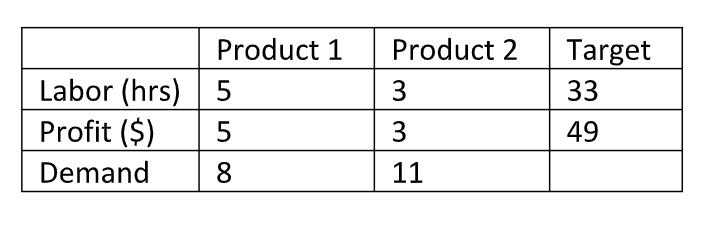


The company incurs a penalty of \$2 for each dollar it falls short of the profit. A \$3 penalty is incurred for
each hour of overtime, and a \$2 penalty is incurred for each hour of labor that is not used. A penalty of
\$6/unit is assessed for any shortfall in meeting demand.

Goal 1: Avoid underutilization of labor.

 Goal 2: Meet demand for product 1.

 Goal 3: Meet demand for product 2.

 Goal 4: Do not use any overtime.


**Problem 6:**

A company wants to achieve 3 goals for the best output of the 3 products. For Product 1, the company has 40 employees for Labor with 2 tons of raw material to make a profit of \$5 million. For Product 2, the company has 30 employees for Labor with 4 tons of raw material to make a profit of \$8 million. For Product 3, the company has 20 employees for Labor with 3 tons of raw material to make a profit of \$4 million.

GOALS:

1.Have 100 or less employees of Labor;Anything more will result a penalty of 5.

2.Have exactly 10 tons of raw material;If it is below 10 tons, the penalty is 8. If it is above, the penalty is 12.

3.Make a profit of at least $30 million;Anything lower will result a penalty of 15.

**Problem 7:**

Microcom is a growth-oriented firm which establishes monthly performance goals for its sales force. Microcom determines that the sales force has a maximum available hours per month for visits of 640 hours. Further, it is estimated that each visit to a potential new client requires 3 hours and each visit to a current client requires 2 hours.

GOALS:

1)Contact at least 200 current clients.

2)Contact at least 120 new clients.

OVERACHIEVING GOALS WILL NOT BE PENALIZED

**Problem 8:**

Alpha company produces two kinds of fancy products, pen holder and paper tray. Production of either of them requires 1 hr production capacity in the plant. The plant has a maximum production capacity of 12 hrs per week. The maximum number of pen holders and paper trays that can be sold are 7 and 10 respectively. The gross margin from the sales of pen holder is \$0.9 and  \$0.45 for a paper tray. The overtime hours should not exceed 3 hrs per week if required. The plant manager has set the following goals in order of importance: 

Priority 1:He wants to avoid any under-utilization of production capacity.

Priority 2: He wants to limit the overtime hours to 3 hrs.

Priority 3: He wants to sell as many pen holders and paper trays as possible. Since the gross margin from the sale of a pen holder is set at twice the amount of the profit from a paper tray, the manager has twice as much desire to achieve the sales goal for pen holders as for paper trays.

 Priority 4:The manager wishes to minimize the overtime operation of the plant as much as possible.





**Problem 9:**

A hotel is constructing three different sizes of conference room, they are:
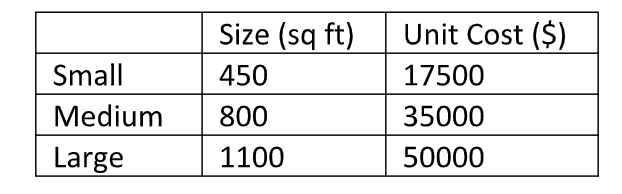

Goal 1: The construction should include 5 small conference rooms.

Goal 2: The construction should include 10 medium conference rooms.

Goal 3: The construction should include 15 large conference rooms.

Goal 4: The construction should consist of 25,000 square feet.

Goal 5: The construction cost should be less than $1,000,000.




**Problem 10:**

Harrison Electric produces two products popular with home renovators, old fashioned chandeliers and ceiling fans. Both chandeliers and fans require a two-step production process involving wiring and assembly. It takes about 2 hrs to wire a chandelier and 3 hrs to wire a fan. Final assembly of the chandelier and fan require 6 and 5 hrs respectively. The production capability is such that only 12 hrs of wiring and 30 hrs of assembly time are available. Each chandelier produced nets the firm \$7 and each fan \$6. The Harrison’s management wants to achieve the following goals with the given priorities: 

 Priority1: Reach a profit as much above \$30 as possible. 

 Priority2: Fully use wiring department hours available. 

Priority3: Avoid assembly department overtime. 

Priority4: Produce at-least 7 ceiling fans.


#**Project Idea:**

 
**Important:** After storming through this whole chapter, you might have some answers or questions that you might have been thinking of. So, here are some questions , you can try to solve after:

##**Questions:**

a] From Solution 1:

1.  After computing, what was the optimal solution of sells for televisions, radios, and tablets?
2.   Has the company achieved the goal of spending $25,000 or less? if not, how much did the company spend?
3. Do you think that the quality of products affects the number of new potential customers? Explain.
4. If this problem was converted into a linear programming problem, and you wanted to find the optimal solution of new potential buyers, could you solve for it? If yes, solve for the optimal solution with the information above.

b] Why is Goal Programming important?


c] What is the main difference between Goal Programming and Linear Programming?


d] Can you solve a Linear Programming problem using the steps to solve a Goal Programming problem? Why, or why not?


e] When is the appropriate time you use Goal Programming?


f] In Goal Programming, the upper and lower limits (or constraints) are
important into finding the optimal solutions. What happens when something does not obey the constraints? Can we still find the optimal solutions?

##**NOTE:**

We have tried to learn a little bit about Goal Programming here, but for some wanderers this material will not be enough. As the world of Goal Programming is wide and vast. If you want to learn more about Goal Programming, you can follow any references given below, or search in the internet.

#References

•	Antonio Nesticò, C. E. (2020). **An Economic Model for Selecting Urban-Scale Projects.** Springer, Cham.

•	Jha, P. (n.d.). **Goal Programming.** Retrieved from "http://du.ac.in/du/uploads/departments/Operational%20Research/25042020_Goal%20Programming.pdf"

•	Sikha, T. (2018). **Comparison between Goal Programming and other Linear Programming Methods.**

•	 **Nonlinear Models:Dynamic ,Goal, and Linear Programming.** ”https://www.ams.jhu.edu/~castello/625.414/Handouts/GoalProg.pdf”

•	Mirko Stojiljkovic. **Hands-On Linear Programming: Optimization With Python**;  " https://realpython.com/linear-programming-pyth"

•	Dusseldorp, V. and Ralph, A., 1976. **Applications of Goal Programming to Education.** [ebook] Phoenix, AZ. Available at: “https://www.science.gov/topicpages/g/goal+programming+theoretical.html”

•	Dan Dan, E. and Desmond .O., 2013. **GOAL PROGRAMMING: - An Application To Budgetary Allocation Of An Institution Of Higher Learning.** [ebook] Available at: https://www.researchgate.net 

•	http://web.tecnico.ulisboa.pt/mcasquilho/acad/or/ftp/GP_TwoMinesConverted.pdf

•	**Goal Programming Example**"http://people.whitman.edu/~hundledr/courses/M339F15/M339/Sect04_16_Beamer.pdf"

•	**Smart Energy Operations Research Lab (SEORL):** http://binghamton.edu/seorl





### Authors

Principal authors of this chapter were: 
[Arun Gyawali](https://github.com/arungyaw),[Khaji Butler](https://github.com/khajibutler),[Utshav Hamal](https://github.com/utsham)